# Graphs Analysis

Graphs analysis from the dataset used in the work done by Pirrò et al. "Community Deception or: How to Stop Fearing Community Detection Algorithms".

Kaggle Notebook: [graphs-analysis](https://www.kaggle.com/andreabernini/graphs-analysis)

In [1]:
from typing import List

import networkx as nx
import scipy as sp
import scipy.io  # for mmread() and mmwrite()
import io  # Use BytesIO as a stand-in for a Python file object
import os

import matplotlib.pyplot as plt
plt.style.use('default')


In [2]:
def import_mtx_graph(file_path: str)->nx.Graph:
    """
    Import a graph from a .mtx file

    Parameters
    ----------
    file_path : str
        File path of the .mtx file

    Returns
    -------
    nx.Graph
        Graph imported from the .mtx file
    """
    try:
        graph_matrix = scipy.io.mmread(file_path)
        graph = nx.Graph(graph_matrix)
        return graph
    except Exception as e:
        print("Error: ", e)
        return None

In [16]:
def graph_analysis(graph:nx.Graph)->None:
    """
    Function to plot many information about the graph

    Parameters
    ----------
    graph : nx.Graph
        Graph to analyse
    """

    # Show Nodes and Edges of the Graph
    print("Nodes: ", nx.nodes(graph))
    print("Edges: ", nx.edges(graph))

    # Show Graph Info
    print("Number of Nodes: ", graph.number_of_nodes())
    print("Number of Edges: ", graph.number_of_edges())
    
    print("-"*20)
    
    # Degree of Nodes
    print("Degree of Nodes: ", nx.degree(graph))
    print("Sorted Degree of Nodes: ", sorted(nx.degree(graph), key=lambda x: x[1], reverse=True))
    print("-"*20)
    # Show Graph Density
    print("Density: ", nx.density(graph))
    print("-"*20)
    # Show Graph Diameter
    print("Diameter: ", nx.diameter(graph))
    print("-"*20)
    # Show Graph Average Shortest Path Length, i.e. average distance between 
    # two members of the graph
    print("Average Shortest Path Length: ", 
        nx.average_shortest_path_length(graph))
    print("-"*20)
    
    try:
        # Show Betweenness Centrality
        print("Betweenness Centrality: ", sorted(nx.betweenness_centrality(
            graph, normalized=True).items(), key=lambda x: x[1], reverse=True)[0:10])
        # Show Closeness Centrality
        print("Closeness Centrality: ", sorted(nx.closeness_centrality(
            graph).items(), key=lambda x: x[1], reverse=True)[0:10])
        # Show Eigenvector Centrality
        print("Eigenvector Centrality: ", sorted(nx.eigenvector_centrality(
            graph).items(), key=lambda x: x[1], reverse=True)[0:10])
    except Exception as e:
        print(e)
        

    # Show Graph
    layout = nx.fruchterman_reingold_layout(graph)
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    nx.draw_networkx(graph, layout, with_labels=True)#, node_color='#FF5733')


In [ ]:
# Folder containing the datasets
FOLDER_PATH = "../dataset/data/"

## Zachary karate club

[kar](http://konect.cc/networks/ucidata-zachary/): This is the well-known and much-used Zachary karate club network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers.

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
Number of Nodes:  34
Number of Edges:  78
--------------------
Degree of Nodes:  [(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4),

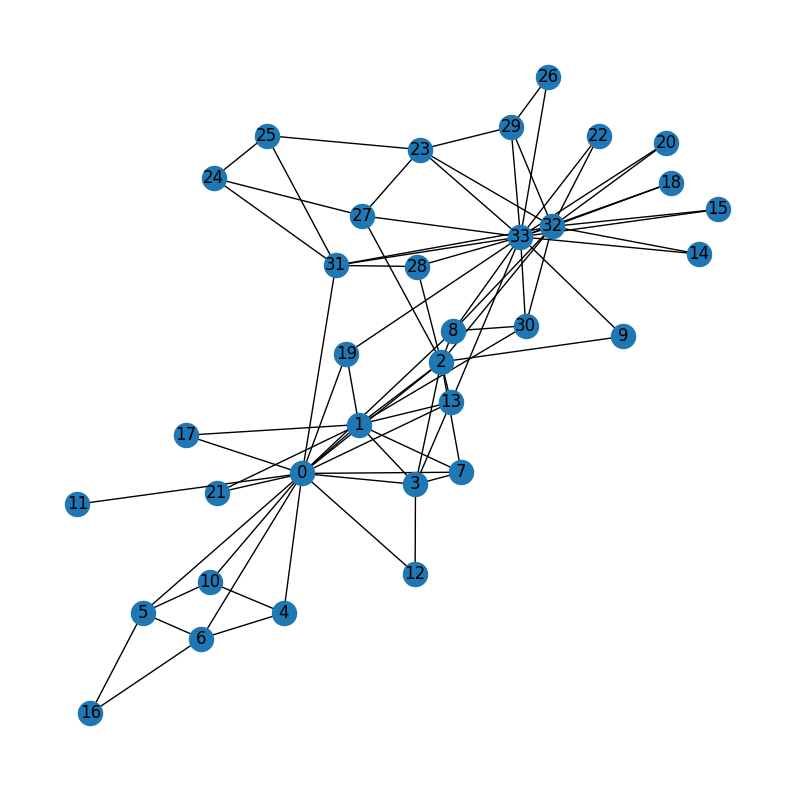

In [17]:
KAR_PATH = FOLDER_PATH + "kar.mtx"
kar = import_mtx_graph(KAR_PATH)

graph_analysis(graph=kar)

### Dolphins

[dol](http://konect.cc/networks/dolphins/): This is a directed social network of bottlenose dolphins. The nodes are the bottlenose dolphins (genus Tursiops) of a bottlenose dolphin community living off Doubtful Sound, a fjord in New Zealand (spelled fiord in New Zealand). An edge indicates a frequent association. The dolphins were observed between 1994 and 2001.

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
Edges:  [(0, 10), (0, 14), (0, 15), (0, 40), (0, 42), (0, 47), (1, 17), (1, 19), (1, 26), (1, 27), (1, 28), (1, 36), (1, 41), (1, 54), (2, 10), (2, 42), (2, 44), (2, 61), (3, 8), (3, 14), (3, 59), (4, 51), (5, 9), (5, 13), (5, 56), (5, 57), (6, 9), (6, 13), (6, 17), (6, 54), (6, 56), (6, 57), (7, 19), (7, 27), (7, 30), (7, 40), (7, 54), (8, 20), (8, 28), (8, 37), (8, 45), (8, 59), (9, 13), (9, 17), (9, 32), (9, 41), (9, 57), (10, 29), (10, 42), (10, 47), (11, 51), (12, 33), (13, 17), (13, 32), (13, 41), (13, 54), (13, 57), (14, 16), (14, 24), (14, 33), (14, 34), (14, 37), (14, 38), (14, 40), (14, 43), (14, 50), (14, 52), (15, 18), (15, 24), (15, 40), (15, 45), (15, 55), (15, 59), (16, 20), (16, 33), (16, 37), (16, 38), (16, 50), (17, 22), (17,

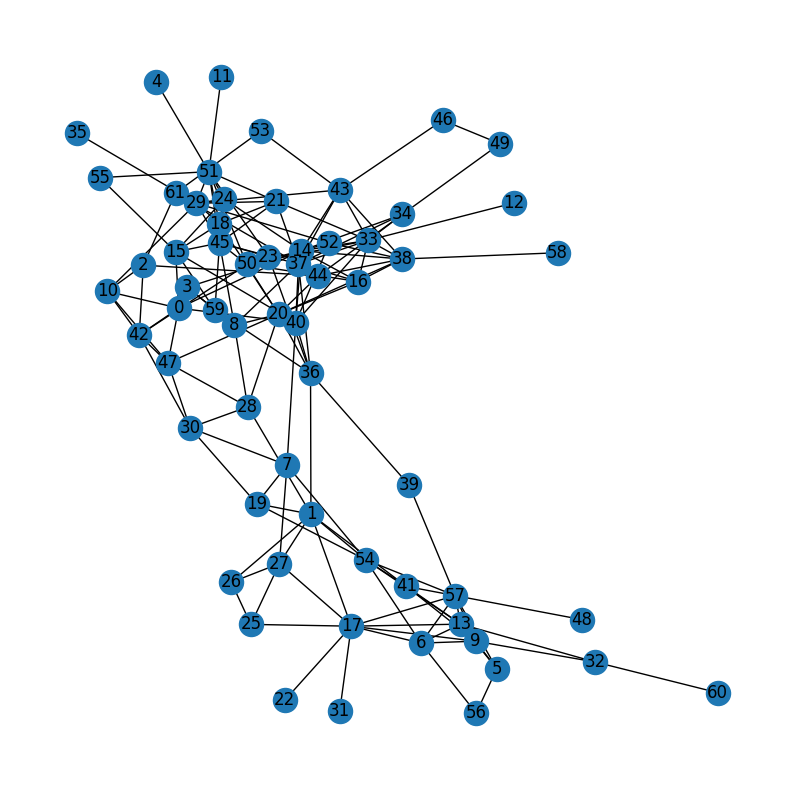

In [18]:
DOL_PATH = FOLDER_PATH + "dol.mtx"
dol = import_mtx_graph(DOL_PATH)

graph_analysis(graph=dol)

### Train bombing

[mad](http://konect.cc/networks/moreno_train/): This undirected network contains contacts between suspected terrorists involved in the train bombing of Madrid on March 11, 2004 as reconstructed from newspapers. A node represents a terrorist and an edge between two terrorists shows that there was a contact between the two terroists. The edge weights denote how 'strong' a connection was. This includes friendship and co-participating in training camps or previous attacks.

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
Edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (1, 2), (2, 3), (2, 4), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 27), (2, 28), (2, 29), (3, 4), (3, 16), (3, 17), (3, 19), (3, 20), (3, 21), (3, 22), (3, 24), (4, 16), (4, 17), (4, 19), (4, 20), (4, 21), (4, 22), (4, 24), (5, 16), (5, 23), (5, 25), (5, 30), (5, 31), (5, 32), (6, 7), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15),

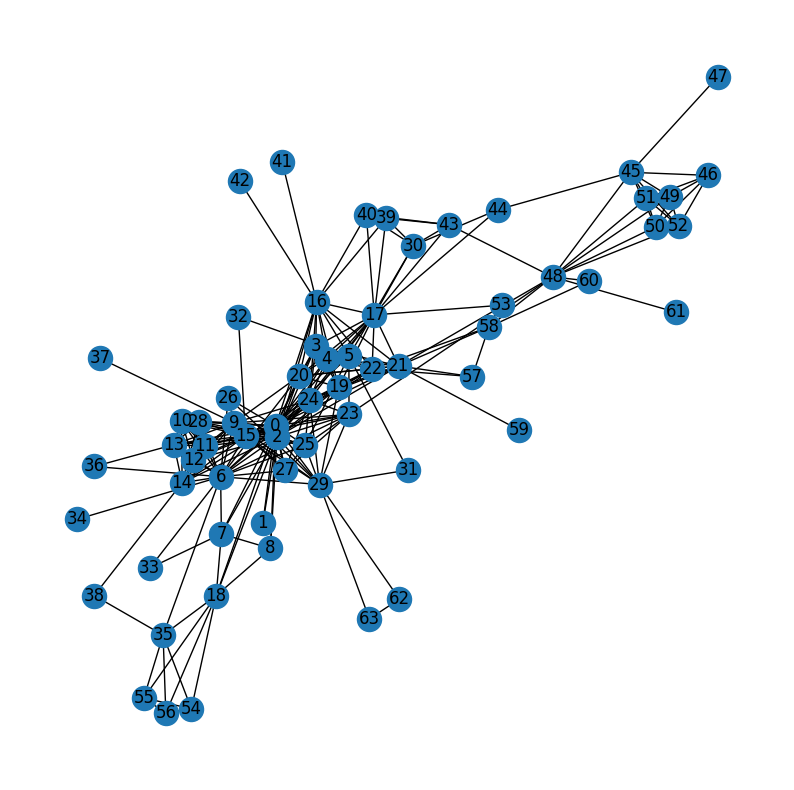

In [19]:
MAD_PATH = FOLDER_PATH + "mad.mtx"
mad = import_mtx_graph(MAD_PATH)

graph_analysis(graph=mad)

### Les Misérables

[lesm](http://konect.cc/networks/moreno_lesmis/): This undirected network contains co-occurances of characters in Victor Hugo's novel 'Les Misérables'. A node represents a character and an edge between two nodes shows that these two characters appeared in the same chapter of the the book. The weight of each link indicates how often such a co-appearance occured.

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76]
Edges:  [(0, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (2, 3), (2, 10), (3, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 31), (10, 32), (10, 33), (10, 34), (10, 35), (10, 36), (10, 37), (10, 38), (10, 43), (10, 44), (10, 48), (10, 49), (10, 51), (10, 55), (10, 58), (10, 64), (10, 68), (10, 69), (10, 70), (10, 71), (10, 72), (12, 23), (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (16, 22), (16, 23), (17, 18), (17, 19), (17, 20), (17, 21), (17, 22), (17, 23), (17, 26), (17, 55), (18, 19), (18, 20), (18, 21), (18, 22), (18, 23), (19, 20), (19, 21), (19, 22), (19, 23

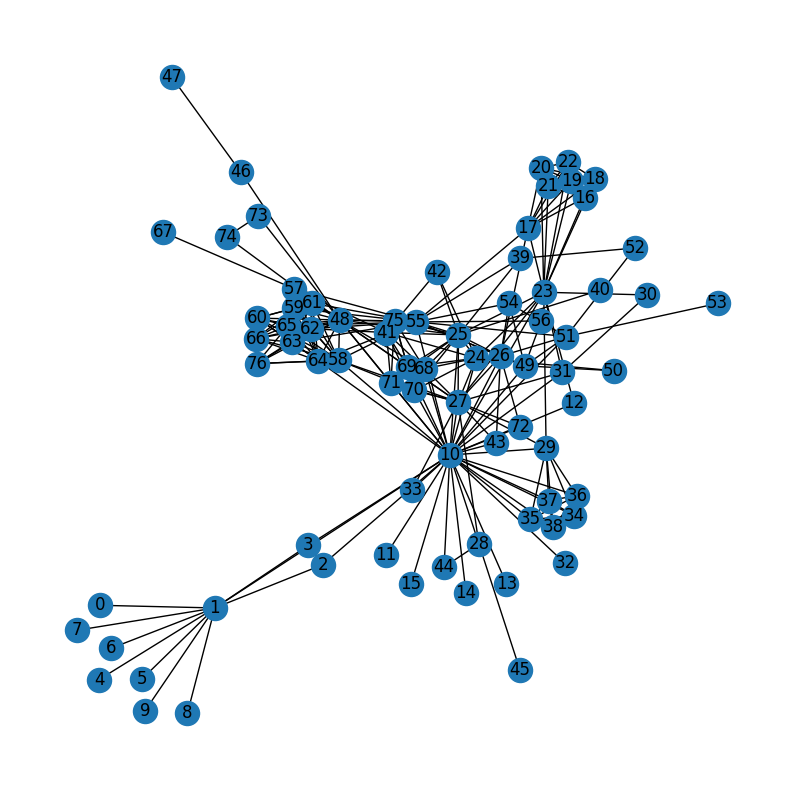

In [20]:
LESM_PATH = FOLDER_PATH + "lesm.mtx"
lesm = import_mtx_graph(LESM_PATH)

graph_analysis(graph=lesm)

### Political books

[polb](http://konect.cc/networks/dimacs10-polbooks/): This is "[a] network of books about US politics published around the time of the 2004 presidential election and sold by the online bookseller Amazon.com. Edges between books represent frequent copurchasing of books by the same buyers. The network was compiled by V. Krebs and is unpublished, but can found on Krebs' web site (<http://www.orgnet.com/>). Thanks to Valdis Krebs for permission to post these data on this web site."

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
Edges:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (1, 3), (1, 5), (1, 6), (2, 4), (2, 5), (2, 7), (3, 5), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 27), (4, 5), (4, 6), (4, 28), (4, 29), (4, 30), (4, 31), (5, 6), (5, 7), (6, 7), (6, 10), (6, 12), (6, 18), (6, 22), (6, 25), (6, 29), (7, 14), (7, 30), (7, 32), (7, 33), (7, 34), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 20), (8, 21), (8, 22), (8, 23), (8, 24), (8, 26), (8,

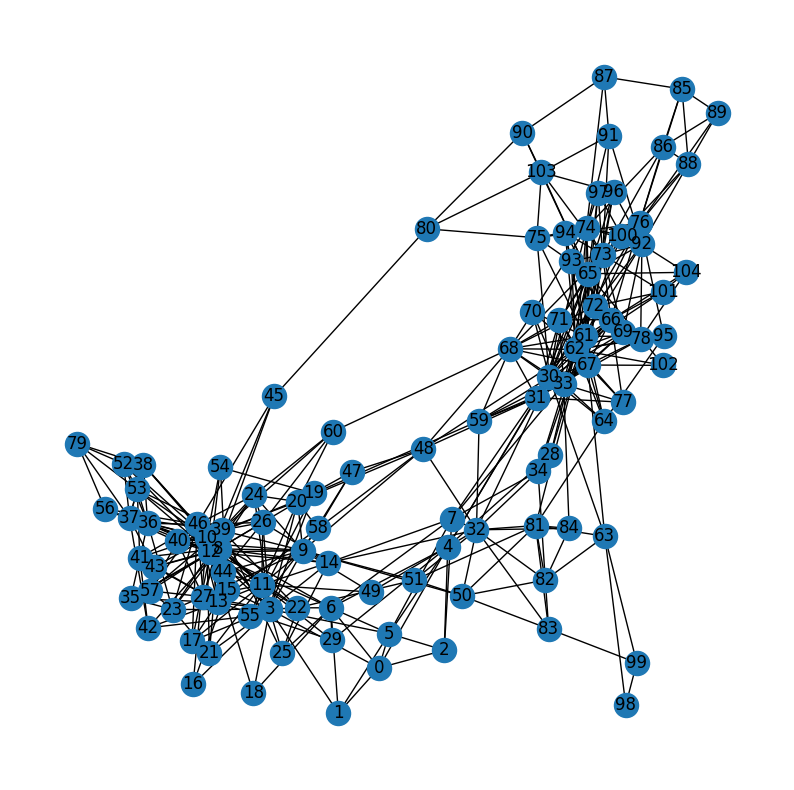

In [21]:
POLB_PATH = FOLDER_PATH + "polb.mtx"
polb = import_mtx_graph(POLB_PATH)

graph_analysis(graph=polb)

### David Copperfield

[words](http://konect.cc/networks/adjnoun_adjacency/): This is the undirected network of common noun and adjective adjacencies for the novel David Copperfield by English 19th century writer Charles Dickens. A node represents either a noun or an adjective. An edge connects two words that occur in adjacent positions. The network is not bipartite, i.e., there are edges connecting adjectives with adjectives, nouns with nouns and adjectives with nouns.

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]
Edges:  [(0, 1), (0, 2), (0, 8), (0, 13), (0, 17), (0, 18), (0, 19), (0, 28), (0, 41), (0, 45), (0, 46), (0, 51), (0, 91), (0, 102), (1, 2), (1, 3), (2, 3), (2, 8), (2, 11), (2, 13), (2, 17), (2, 21), (2, 22), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 31), (2, 34), (2, 36), (2, 41), (2, 42), (2, 45), (2, 50), (2, 51), (2, 54), (2, 66), (2, 73), (2, 83), (2, 93), (2, 97), (2, 98), (2, 102), (2, 104), (2, 105), (2, 111), (3, 8), (3, 10), (3, 18), (3, 41), (3, 43), (3, 51), (3, 85), (4, 5), (4, 6), (4, 17), (4, 27), (4, 32), (4, 39

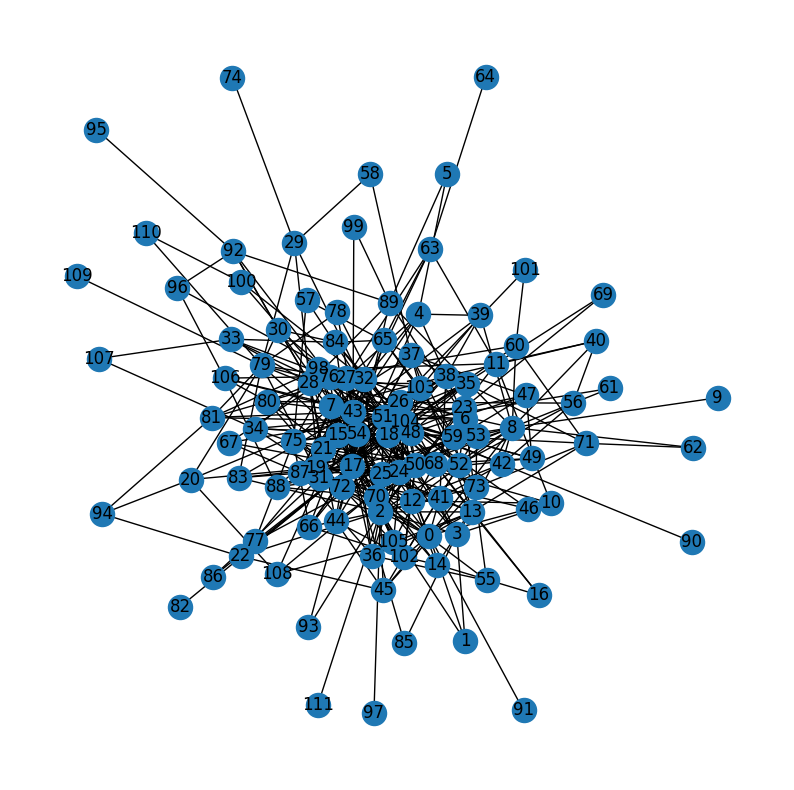

In [23]:
WORDS_PATH = FOLDER_PATH + "words.mtx"
words = import_mtx_graph(WORDS_PATH)

graph_analysis(graph=words)

### Erdős

[erdos](http://konect.cc/networks/pajek-erdos/): This is the co-authorship graph around Paul Erdős. The network is as of 2002, and contains people who have, directly and indirectly, written papers with Paul Erdős. This network is used to define the "Erdős number", i.e., the distance between any node and Paul Erdős. This dataset was assembled by the Pajek project; we do not know the extent of data that is included.

Nodes:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

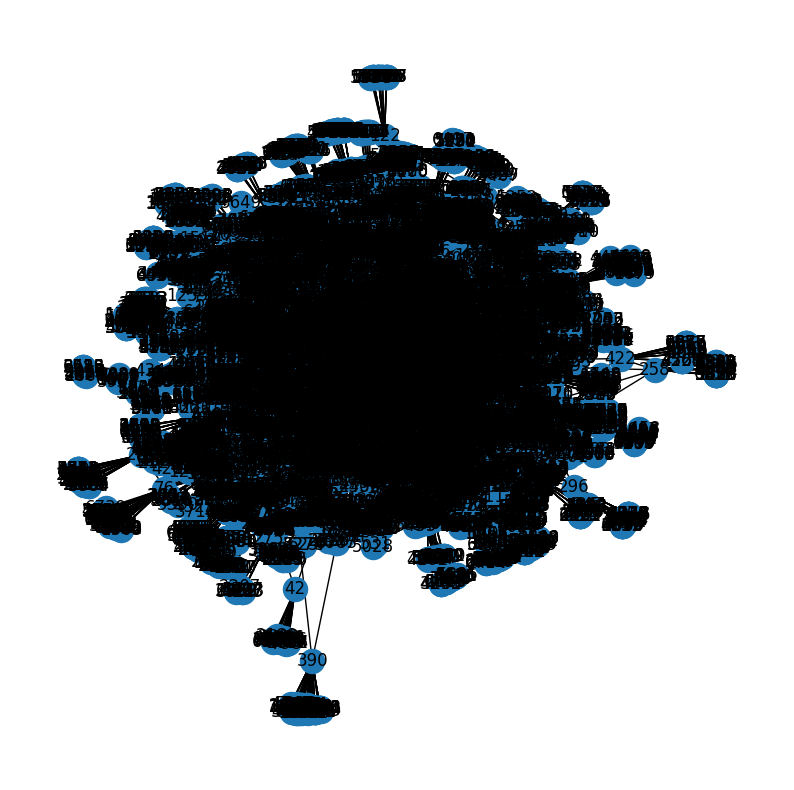

In [25]:
ERDOS_PATH = FOLDER_PATH + "erdos.mtx"
erdos = import_mtx_graph(ERDOS_PATH)

graph_analysis(graph=erdos)

### US power grid

[pow](http://konect.cc/networks/opsahl-powergrid/):  This undirected network contains information about the power grid of the Western States of the United States of America. An edge represents a power supply line. A node is either a generator, a transformator or a substation.

In [ ]:
POW_PATH = FOLDER_PATH + "pow.mtx"
pow_grid = import_mtx_graph(POW_PATH)

graph_analysis(graph=pow_grid)

### socfb-American75

[fb-75](https://networkrepository.com/socfb-American75.php): A social friendship network extracted from Facebook consisting of people (nodes) with edges representing friendship ties.

In [ ]:
FB_75_PATH = FOLDER_PATH + "fb-75.mtx"
fb_75 = import_mtx_graph(FB_75_PATH)

graph_analysis(graph=fb_75)

### coauthors-dblp

[dblp](https://networkrepository.com/ca-coauthors-dblp.php): A co-authorship network extracted from DBLP consisting of authors (nodes) with edges representing co-authorships.

In [ ]:
DBLP_PATH = FOLDER_PATH + "dblp.mtx"
dblp = import_mtx_graph(DBLP_PATH)

graph_analysis(graph=dblp)

### Astro Physics collaboration network

[astr](http://snap.stanford.edu/data/ca-AstroPh.html): Arxiv ASTRO-PH (Astro Physics) collaboration network is from the e-print arXiv and covers scientific collaborations between authors papers submitted to Astro Physics category. If an author i co-authored a paper with author j, the graph contains a undirected edge from i to j. If the paper is co-authored by k authors this generates a completely connected (sub)graph on k nodes.

The data covers papers in the period from January 1993 to April 2003 (124 months). It begins within a few months of the inception of the arXiv, and thus represents essentially the complete history of its ASTRO-PH section.

In [ ]:
ASTR_PATH = FOLDER_PATH + "astr.mtx"
astr = import_mtx_graph(ASTR_PATH)

graph_analysis(graph=astr)

### Amazon product co-purchasing network metadata

[amz](http://snap.stanford.edu/data/amazon-meta.html): The data was collected by crawling Amazon website and contains product metadata and review information about 548,552 different products (Books, music CDs, DVDs and VHS video tapes).

For each product the following information is available:
    - Title
    - Salesrank
    - List of similar products (that get co-purchased with the current product)
    - Detailed product categorization
    - Product reviews: time, customer, rating, number of votes, number of people that found the review helpful
The data was collected in summer 2006.

In [ ]:
AMZ_PATH = FOLDER_PATH + "amz.mtx"
amz = import_mtx_graph(AMZ_PATH)

graph_analysis(graph=amz)

### Youtube social network and ground-truth communities

[you](http://snap.stanford.edu/data/com-Youtube.html): Youtube is a video-sharing web site that includes a social network. In the Youtube social network, users form friendship each other and users can create groups which other users can join. We consider such user-defined groups as ground-truth communities. This data is provided by Alan Mislove et al.

We regard each connected component in a group as a separate ground-truth community. We remove the ground-truth communities which have less than 3 nodes. We also provide the top 5,000 communities with highest quality which are described in our paper. As for the network, we provide the largest connected component.

In [ ]:
YOU_PATH = FOLDER_PATH + "you.mtx"
you = import_mtx_graph(YOU_PATH)

graph_analysis(graph=you)

### Orkut social network and ground-truth communities

[ork](http://snap.stanford.edu/data/com-Orkut.html): Orkut is a free on-line social network where users form friendship each other. Orkut also allows users form a group which other members can then join. We consider such user-defined groups as ground-truth communities. We provide the Orkut friendship social network and ground-truth communities. This data is provided by Alan Mislove et al.

We regard each connected component in a group as a separate ground-truth community. We remove the ground-truth communities which have less than 3 nodes. We also provide the top 5,000 communities with highest quality which are described in our paper. As for the network, we provide the largest connected component.

In [ ]:
ORK_PATH = FOLDER_PATH + "ork.mtx"
ork = import_mtx_graph(ORK_PATH)

graph_analysis(graph=ork)